In [48]:
import cv2
from numpy import array

def read_and_process_images(list_of_images):
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread("class5_data/" + str(image), cv2.IMREAD_GRAYSCALE), (50,50), interpolation = cv2.INTER_CUBIC))
        
        if 'apple' in str(image):
            y.append(0)
        
        if 'banana' in str(image):
            y.append(1)
        
        if 'water' in str(image):
            y.append(2)
        
        if 'potato' in str(image):
            y.append(3)
        
        if 'instant' in str(image):
            y.append(4)
    return array(X),array(y)

In [49]:
file_names=[]

In [50]:
import os
dirListing = os.listdir("class5_data")
for filename in dirListing:
    file_names.append(str(filename))

In [51]:
len(file_names)

1419

In [52]:
X, y = read_and_process_images(file_names)

In [53]:
y.shape

(1419,)

Training data shape (1200, 50, 50, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 50, 50, 50)        1300      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 25, 25, 50)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 25, 25, 100)       125100    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 13, 13, 100)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 13, 13, 200)       500200    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 7, 7, 200)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 7,

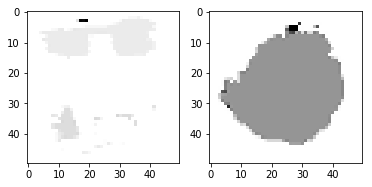

In [54]:
# Download and visualize the data: see all here https://www.tensorflow.org/api_docs/python/tf/keras/datasets
import tensorflow as tf

start = 0 
middle = 1200
end = 1419
X_train = X[0:middle].reshape(X[0:middle].shape[0], 50, 50,1)
y_train = tf.keras.utils.to_categorical(y[0:middle], 5)


X_val = X[middle:end].reshape(X[middle:end].shape[0], 50, 50, 1)
y_val = tf.keras.utils.to_categorical(y[middle:end], 5)


from matplotlib import pyplot as plt
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(50,50), cmap=plt.cm.Greys);
ax2.imshow(X_train[5].reshape(50,50), cmap=plt.cm.Greys);


# Build your DNN, an example model is given for you.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(50, (5,5), padding='same', activation='relu', input_shape=(50, 50,1)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(100, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),

    tf.keras.layers.Conv2D(200, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(200, (5,5), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(200, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),

    tf.keras.layers.Conv2D(400, (5,5), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(400, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),

    tf.keras.layers.Conv2D(200, (5,5), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(200, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

In [55]:
hist1 = model.fit(X_train, y_train,
          batch_size=25,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 1200 samples, validate on 219 samples
Epoch 1/10
1200/1200 [==============================] - 14s 12ms/sample - loss: 1.0326 - acc: 0.5708 - val_loss: 0.5994 - val_acc: 0.7717
Epoch 2/10
1200/1200 [==============================] - 14s 11ms/sample - loss: 0.4957 - acc: 0.8092 - val_loss: 0.2850 - val_acc: 0.8904
Epoch 3/10
1200/1200 [==============================] - 14s 11ms/sample - loss: 0.2719 - acc: 0.9033 - val_loss: 0.3870 - val_acc: 0.8356
Epoch 4/10
1200/1200 [==============================] - 13s 11ms/sample - loss: 0.1717 - acc: 0.9392 - val_loss: 0.0882 - val_acc: 0.9726
Epoch 5/10
1200/1200 [==============================] - 14s 11ms/sample - loss: 0.1956 - acc: 0.9408 - val_loss: 0.2471 - val_acc: 0.9406
Epoch 6/10
1200/1200 [==============================] - 14s 11ms/sample - loss: 0.1024 - acc: 0.9642 - val_loss: 0.0355 - val_acc: 0.9909
Epoch 7/10
1200/1200 [==============================] - 14s 11ms/sample - loss: 0.0370 - acc: 0.9883 - val_loss: 0.6150 - val

In [56]:
predictions = model.predict(X_val.reshape(X_val.shape[0], 50, 50,1))

In [57]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_val.argmax(axis=1), predictions.argmax(axis=1))


In [58]:
matrix

array([[29,  0,  0,  0,  0],
       [ 0, 23,  0,  0,  0],
       [ 0,  0, 61,  0,  0],
       [ 0,  0,  0, 39,  1],
       [ 0,  0,  0,  0, 66]])